In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import koreanize_matplotlib
from matplotlib import rc
plt.rc('font',family='malgun gothic')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# 데이터 파일 로드
df = pd.read_parquet("mini3_data/oct_customer.gzip")
df

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류
index,,,,,,,,
209,2019-10-01 00:02:53 UTC,view,28714755,respect,51.22,552469659,apparel,shoes
245,2019-10-01 00:03:29 UTC,view,28717908,burgerschuhe,102.45,547041231,apparel,shoes
1820,2019-10-01 02:20:12 UTC,view,28713632,destra,37.58,515903935,apparel,shoes
1883,2019-10-01 02:20:28 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes
1987,2019-10-01 02:20:47 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes
...,...,...,...,...,...,...,...,...
42444229,2019-10-31 23:22:00 UTC,view,28719198,salamander,146.46,534452201,apparel,shoes
42444248,2019-10-31 23:22:12 UTC,view,28718694,respect,89.84,534452201,apparel,shoes
42444262,2019-10-31 23:22:19 UTC,view,55000024,nike,76.96,518917738,apparel,costume


In [3]:
# event_type 별 컬럼 생성
df.loc[df['event_type'] == 'view', 'view'] = '1'
df.loc[df['event_type'] == 'cart', 'cart'] = '1'
df.loc[df['event_type'] == 'purchase', 'purchase'] = '1'
df = df.fillna(0)
df['view'] = df['view'].astype(int)
df['cart'] = df['cart'].astype(int)
df['purchase'] = df['purchase'].astype(int)
df

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase
index,,,,,,,,,,,
209,2019-10-01 00:02:53 UTC,view,28714755,respect,51.22,552469659,apparel,shoes,1,0,0
245,2019-10-01 00:03:29 UTC,view,28717908,burgerschuhe,102.45,547041231,apparel,shoes,1,0,0
1820,2019-10-01 02:20:12 UTC,view,28713632,destra,37.58,515903935,apparel,shoes,1,0,0
1883,2019-10-01 02:20:28 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes,1,0,0
1987,2019-10-01 02:20:47 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
42444229,2019-10-31 23:22:00 UTC,view,28719198,salamander,146.46,534452201,apparel,shoes,1,0,0
42444248,2019-10-31 23:22:12 UTC,view,28718694,respect,89.84,534452201,apparel,shoes,1,0,0
42444262,2019-10-31 23:22:19 UTC,view,55000024,nike,76.96,518917738,apparel,costume,1,0,0


In [4]:
# 실 구매 데이터 확인
df[df["user_id"] == 552469659]

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase
index,,,,,,,,,,,
209,2019-10-01 00:02:53 UTC,view,28714755,respect,51.22,552469659,apparel,shoes,1,0,0
1234459,2019-10-01 22:28:12 UTC,view,28719310,fila,203.09,552469659,apparel,shoes,1,0,0
1234590,2019-10-01 22:29:07 UTC,view,28718041,millionaire,113.00,552469659,apparel,shoes,1,0,0
1234635,2019-10-01 22:29:25 UTC,view,28715756,nexpero,107.85,552469659,apparel,shoes,1,0,0
1234663,2019-10-01 22:29:36 UTC,view,28715764,nexpero,107.85,552469659,apparel,shoes,1,0,0
1234684,2019-10-01 22:29:48 UTC,view,28715764,nexpero,107.85,552469659,apparel,shoes,1,0,0
1234744,2019-10-01 22:30:18 UTC,view,28717071,puma,100.13,552469659,apparel,shoes,1,0,0
1234783,2019-10-01 22:30:37 UTC,view,28715760,nexpero,107.85,552469659,apparel,shoes,1,0,0
1234800,2019-10-01 22:30:44 UTC,view,28715765,nexpero,107.85,552469659,apparel,shoes,1,0,0


In [5]:
# 유저, 상품별 그룹화
v_c_p = df.groupby(['user_id','product_id']).agg({'view':'sum','cart':'sum','purchase':'sum'})
v_c_p

view  cart  purchase
user_id   product_id                      
469361896 28713438       1     0         0
477446941 48200446       2     0         0
          48200471       1     0         0
489085769 28719484       1     0         0
          35200611       1     0         0
...                    ...   ...       ...
566207721 45600224       1     0         0
566238118 28721084       1     0         0
566243643 28704135       3     0         1
          28708392       1     0         0
          28715777       1     0         0

[158975 rows x 3 columns]

In [120]:
# apparel 항목의 로그 확인
# 기술통계값 -> 평균
# 구매가 0.038698 번 일어나기 위해서는 평균기준
# view는 1.555848 번
# cart는 0.000075 번 일어나야 한다. 

v_c_p.describe()

,view,cart,purchase
count,158975.000000,158975.000000,158975.000000
mean,1.555848,0.000075,0.038698
std,1.861848,0.013737,0.247268
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,80.000000,4.000000,17.000000


In [121]:
# 수치 변환

# 평균적으로 apparel 모든 상품의 평균 구매에는
# 평균 40번의 view와
# 평균 0.002의 cart의 행태를 보임
# view 이후 cart에 담기 보다는 결정 했을때 바로 구매 행태

change = v_c_p.describe().copy()
(change.iloc[1] / 0.038698)

view        40.204879
cart         0.001951
purchase     0.999998
Name: mean, dtype: float64

In [122]:
# 유저별 제품별 실구매 로그 확인
real = v_c_p[v_c_p['purchase']!=0]
real

view  cart  purchase
user_id   product_id                      
496157842 28719466       2     0         1
512365769 28705362       4     0         1
512366835 28715723       4     0         1
512366935 28718660      12     0         1
          28718676      20     0         3
...                    ...   ...       ...
566018612 28717126       2     0         1
566034979 28712564       2     0         1
566145878 28717905       3     0         1
566170149 28721084       1     0         1
566243643 28704135       3     0         1

[5177 rows x 3 columns]

In [123]:
# apparel 실 구매자들은

# 평균적으로 1번의 구매에는
# 평균 5.18의 view와
# 평균 0.002의 cart의 행태를 보임
# view 이후 cart에 담기 보다는 결정 했을때 바로 구매 행태


real.describe()

,view,cart,purchase
count,5177.000000,5177.000000,5177.000000
mean,6.164188,0.001932,1.188333
std,6.449639,0.073524,0.715172
min,1.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000
50%,4.000000,0.000000,1.000000
75%,8.000000,0.000000,1.000000
max,80.000000,4.000000,17.000000


In [124]:
# 수치 변환
total_mean = real.describe().copy()
total_mean = (total_mean.iloc[1] / 1.188333)
total_mean

view        5.187256
cart        0.001625
purchase    1.000000
Name: mean, dtype: float64

# 소분류별 구매 행태 분석

In [11]:
df

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase
index,,,,,,,,,,,
209,2019-10-01 00:02:53 UTC,view,28714755,respect,51.22,552469659,apparel,shoes,1,0,0
245,2019-10-01 00:03:29 UTC,view,28717908,burgerschuhe,102.45,547041231,apparel,shoes,1,0,0
1820,2019-10-01 02:20:12 UTC,view,28713632,destra,37.58,515903935,apparel,shoes,1,0,0
1883,2019-10-01 02:20:28 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes,1,0,0
1987,2019-10-01 02:20:47 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
42444229,2019-10-31 23:22:00 UTC,view,28719198,salamander,146.46,534452201,apparel,shoes,1,0,0
42444248,2019-10-31 23:22:12 UTC,view,28718694,respect,89.84,534452201,apparel,shoes,1,0,0
42444262,2019-10-31 23:22:19 UTC,view,55000024,nike,76.96,518917738,apparel,costume,1,0,0


In [13]:
# apparel 품목 중 판매 순위 확인
# shoes > underwear > costume 순
g_1 = df["소분류"].value_counts().copy()
g_1

shoes        229568
underwear      7509
costume        5572
dress          2872
tshirt         2385
shirt          2108
trousers       1494
scarf           638
jeans           331
sock            318
jumper          306
belt            133
skirt           114
shorts           83
jacket           74
Name: 소분류, dtype: int64

Text(0.5, 1.0, '10월 apparel 내 판매 수량')

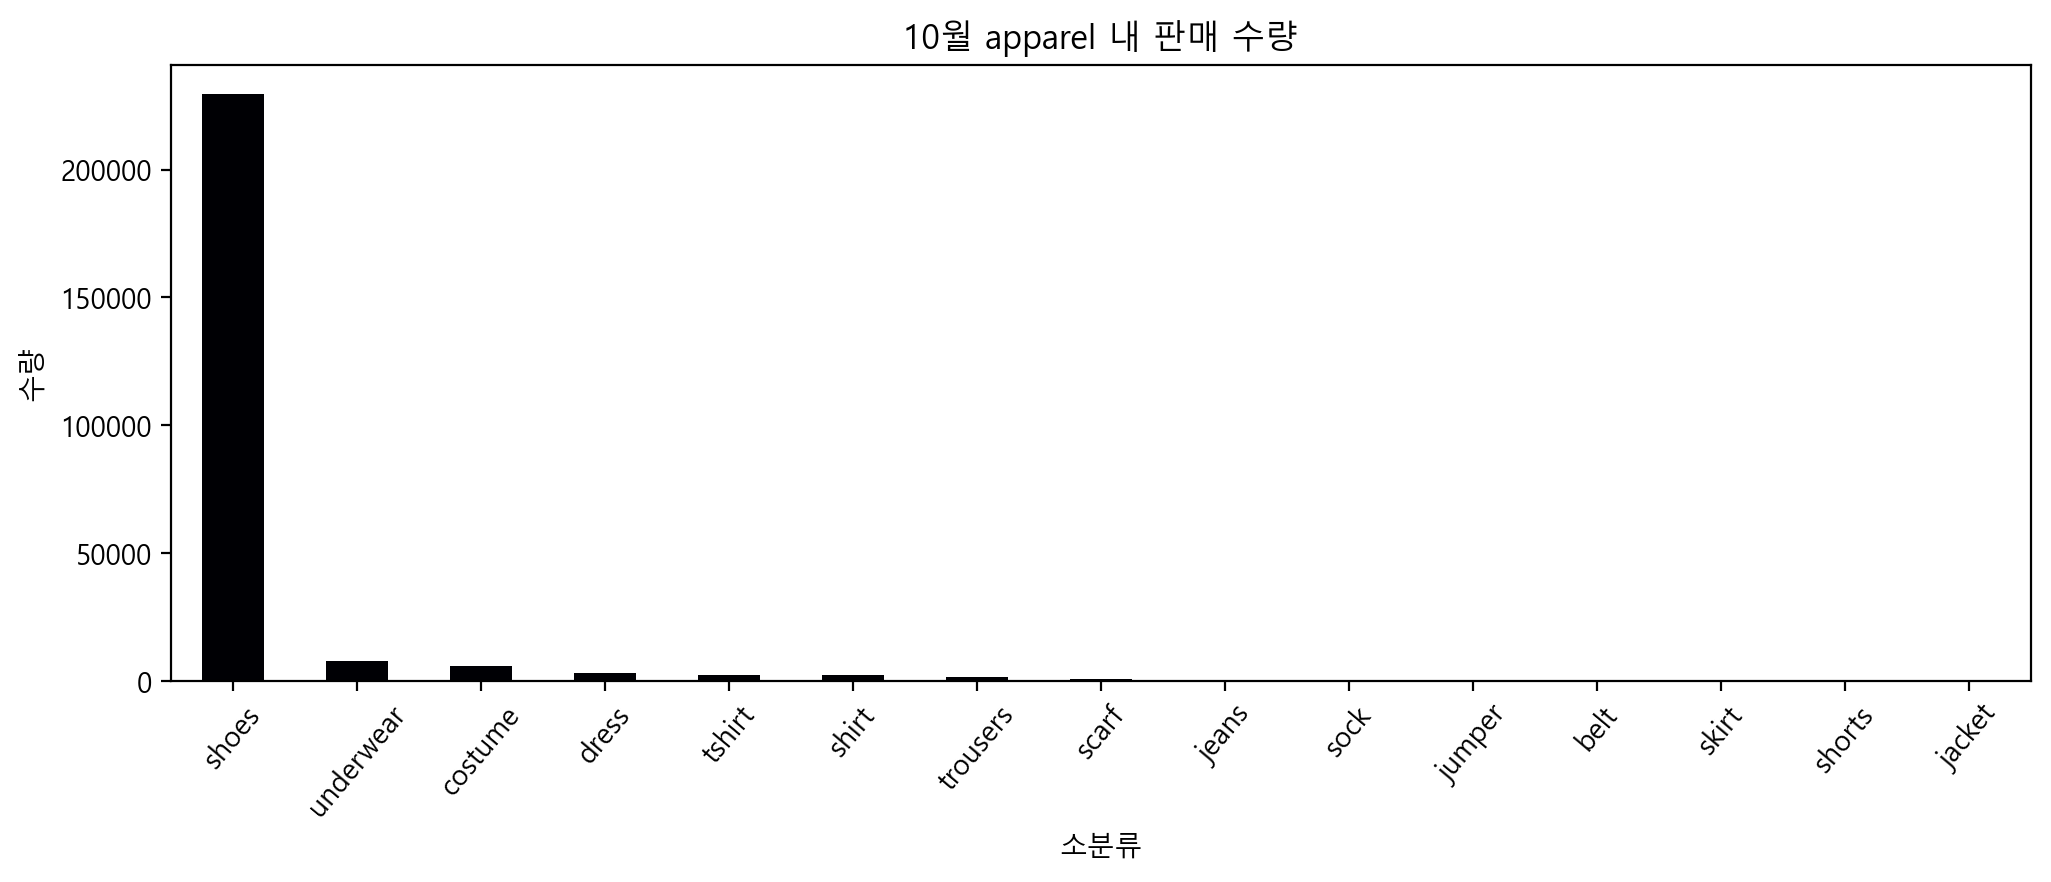

In [119]:
# pointplot 으로 시간대( InvoiceHour ) 구매 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
g_1.plot(kind='bar', rot=50, cmap='inferno');
plt.xlabel("소분류")
plt.ylabel("수량")
plt.title("10월 apparel 내 판매 수량")

# 10월 top3 항목 분석

## 품목 shoes 분석 

In [12]:
shoes_data = df[df['소분류'] == 'shoes']
shoes_data

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase
index,,,,,,,,,,,
209,2019-10-01 00:02:53 UTC,view,28714755,respect,51.22,552469659,apparel,shoes,1,0,0
245,2019-10-01 00:03:29 UTC,view,28717908,burgerschuhe,102.45,547041231,apparel,shoes,1,0,0
1820,2019-10-01 02:20:12 UTC,view,28713632,destra,37.58,515903935,apparel,shoes,1,0,0
1883,2019-10-01 02:20:28 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes,1,0,0
1987,2019-10-01 02:20:47 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
42444194,2019-10-31 23:21:48 UTC,view,28719198,salamander,146.46,534452201,apparel,shoes,1,0,0
42444229,2019-10-31 23:22:00 UTC,view,28719198,salamander,146.46,534452201,apparel,shoes,1,0,0
42444248,2019-10-31 23:22:12 UTC,view,28718694,respect,89.84,534452201,apparel,shoes,1,0,0


In [15]:
shoes_vcp = shoes_data.groupby(['user_id','product_id']).agg({'view':'sum','cart':'sum','purchase':'sum'})
shoes_vcp

view  cart  purchase
user_id   product_id                      
469361896 28713438       1     0         0
489085769 28719484       1     0         0
496157842 28713149       2     0         0
          28716479       1     0         0
          28717975       1     0         0
...                    ...   ...       ...
566207721 45600224       1     0         0
566238118 28721084       1     0         0
566243643 28704135       3     0         1
          28708392       1     0         0
          28715777       1     0         0

[139618 rows x 3 columns]

In [16]:
shoes_vcp = shoes_vcp[shoes_vcp['purchase'] != 0]
shoes_vcp

view  cart  purchase
user_id   product_id                      
496157842 28719466       2     0         1
512365769 28705362       4     0         1
512366835 28715723       4     0         1
512366935 28718660      12     0         1
          28718676      20     0         3
...                    ...   ...       ...
566018612 28717126       2     0         1
566034979 28712564       2     0         1
566145878 28717905       3     0         1
566170149 28721084       1     0         1
566243643 28704135       3     0         1

[4910 rows x 3 columns]

In [17]:
# shoes 구매자들은
# 평균 1회 구매시
# 5.24번을 view하고 구매

shoes_vcp.describe()

,view,cart,purchase
count,4910.000000,4910.0,4910.000000
mean,6.243992,0.0,1.190631
std,6.511217,0.0,0.726302
min,1.000000,0.0,1.000000
25%,2.000000,0.0,1.000000
50%,4.000000,0.0,1.000000
75%,8.000000,0.0,1.000000
max,80.000000,0.0,17.000000


In [18]:
shoes_mean = shoes_vcp.describe().iloc[1] /  1.190631
shoes_mean

view        5.244271
cart        0.000000
purchase    1.000000
Name: mean, dtype: float64

In [19]:
# 소분류 분석 함수 생성

def analysis_category(i):
    i_data = df[df['소분류'] == i]
    i_vcp = i_data.groupby(['user_id','product_id']).agg({'view':'sum','cart':'sum','purchase':'sum'})
    i_vcp = i_vcp[i_vcp['purchase'] != 0]
    return i_vcp.describe()

## 품목 underwear 분석

In [20]:
i = 'underwear'
analysis_category(i)

,view,cart,purchase
count,85.000000,85.0,85.000000
mean,4.517647,0.0,1.141176
std,3.714873,0.0,0.440588
min,1.000000,0.0,1.000000
25%,2.000000,0.0,1.000000
50%,3.000000,0.0,1.000000
75%,6.000000,0.0,1.000000
max,19.000000,0.0,3.000000


In [21]:
underwear_mean = analysis_category('underwear').copy().iloc[1] /  1.141176
underwear_mean

view        3.958765
cart        0.000000
purchase    1.000000
Name: mean, dtype: float64

## 품목 costume 분석

In [22]:
i = 'costume'
analysis_category(i)

,view,cart,purchase
count,65.000000,65.0,65.000000
mean,5.861538,0.0,1.215385
std,7.117050,0.0,0.599278
min,1.000000,0.0,1.000000
25%,2.000000,0.0,1.000000
50%,3.000000,0.0,1.000000
75%,6.000000,0.0,1.000000
max,38.000000,0.0,4.000000


In [23]:
costume_mean = analysis_category('costume').copy().iloc[1] /  1.215385
costume_mean

view        4.822783
cart        0.000000
purchase    1.000000
Name: mean, dtype: float64

In [47]:
oct_view = pd.DataFrame({'product' : ['shoes', 'underwear', 'costume', 'total'], 'view' : [shoes_mean[0], underwear_mean[0], costume_mean[0], total_mean[0]]})
oct_view

,product,view
0,shoes,5.244271
1,underwear,3.958765
2,costume,4.822783
3,total,5.187256


## 소분류 전체, shoes, underwear, costume 시간 비교

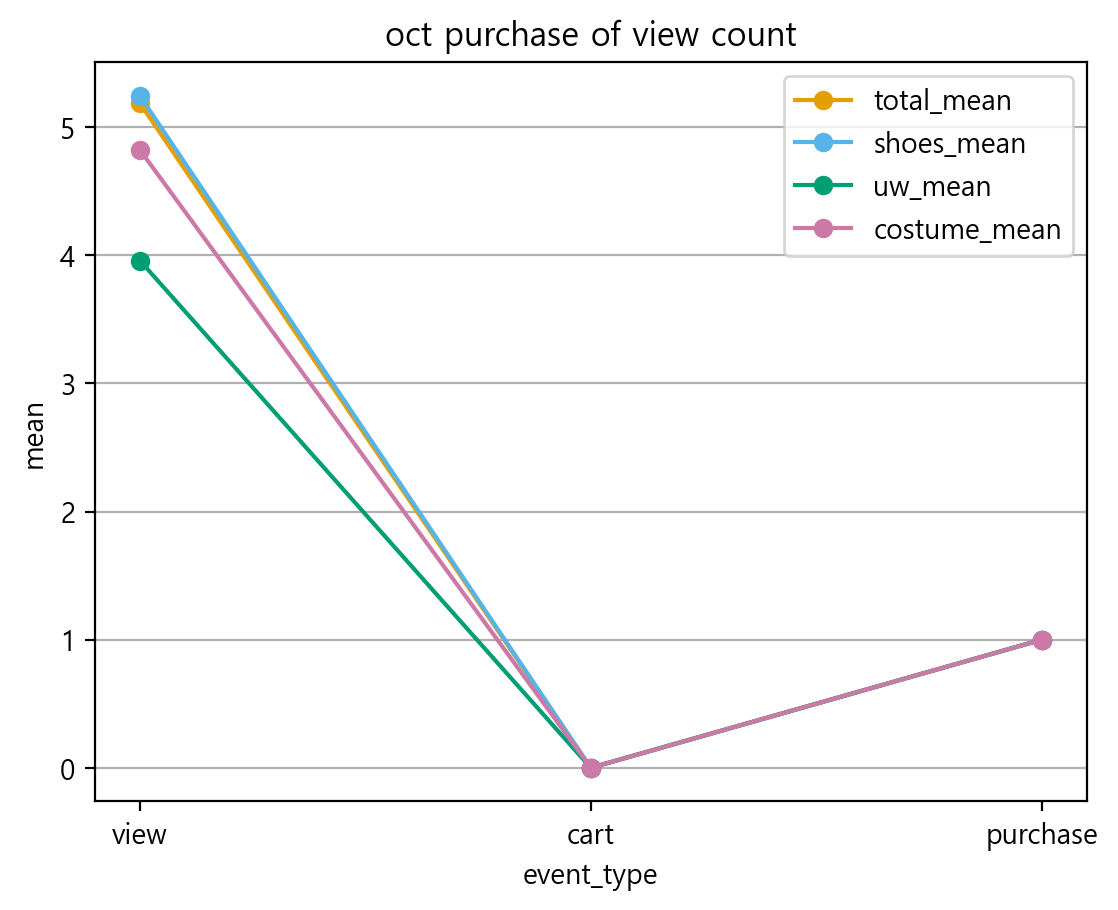

In [24]:
plt.plot(total_mean, color='#E69F00', marker='o', label="total_mean")
plt.plot(shoes_mean, color='#56B4E9',  marker='o', label="shoes_mean")
plt.plot(underwear_mean, color='#009E73', marker='o', label="uw_mean")
plt.plot(costume_mean, color='#CC79A7', marker='o', label="costume_mean")
plt.grid(True, axis='y')
plt.title('oct purchase of view count')
plt.xlabel('event_type')
plt.ylabel('mean')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Text(0.5, 1.0, '10월 제품 구매 평균 view 수')

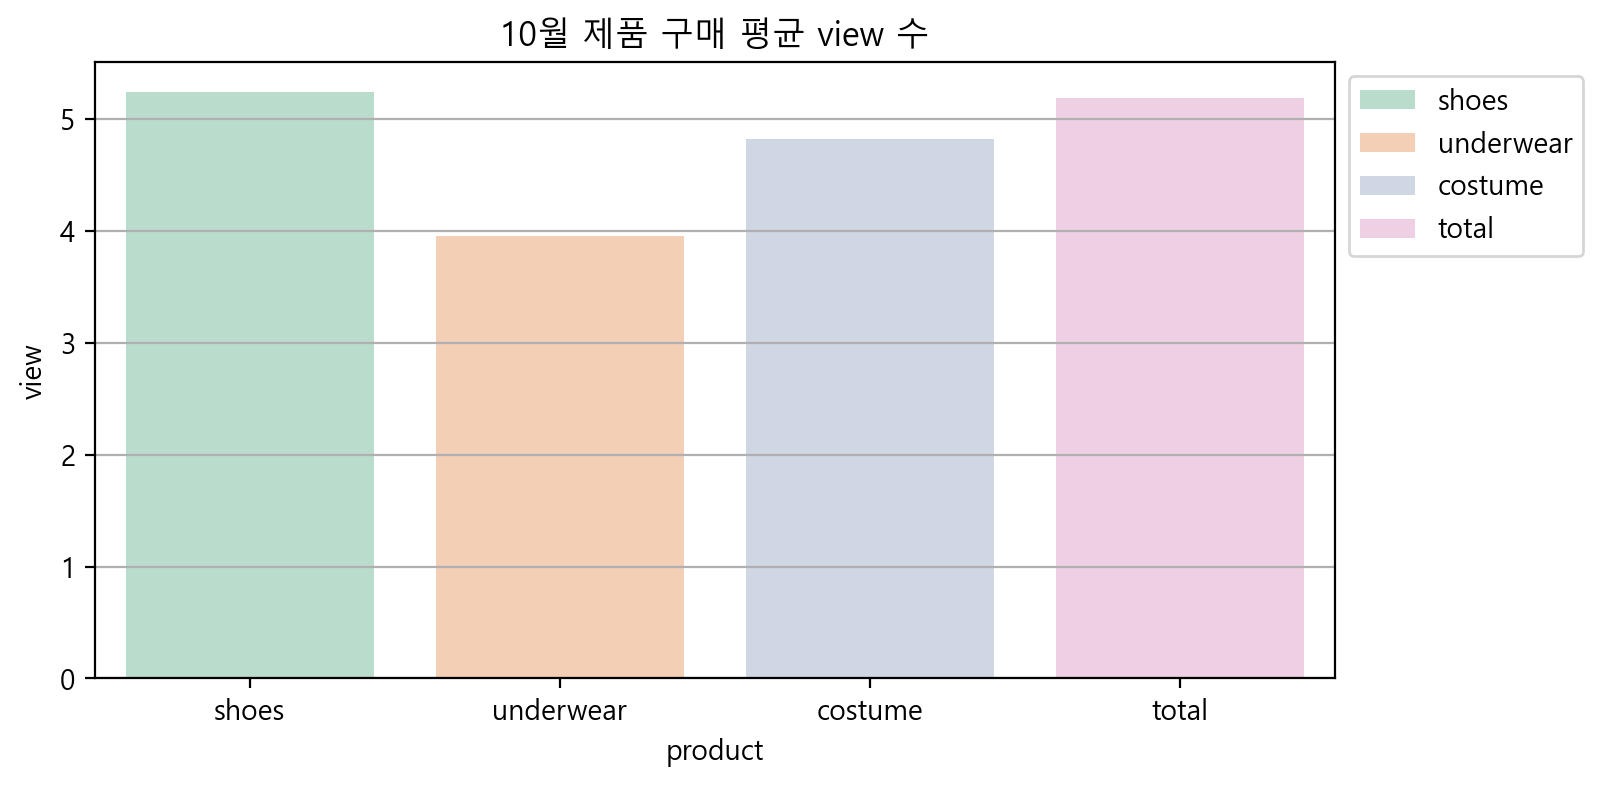

In [115]:
# view만 시각화
f, ax = plt.subplots(figsize=(8, 4))

sns.barplot(oct_view, x='product', y='view', palette="Pastel2", label=oct_view['product'])

ax.grid(True, axis='y')
ax.legend(bbox_to_anchor=(1, 1))
plt.title('10월 제품 구매 평균 view 수')

# RFM으로 분류한 그룹별 apparel 행태 분석

In [25]:
# rfm 데이터 로드
rfm = pd.read_csv("mini3_data/oct_rfm.csv")
rfm

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_class
0,496157842,11,1,52.00,2,4,3,243,9,gold
1,512365769,17,1,23.68,3,4,4,344,11,platinum
2,512366835,9,1,64.61,2,4,3,243,9,gold
3,512366935,11,4,418.79,2,1,1,211,4,silver
4,512367789,28,1,10.04,4,4,4,444,12,platinum
...,...,...,...,...,...,...,...,...,...,...
4069,566018612,1,1,31.92,1,4,4,144,9,gold
4070,566034979,1,1,128.45,1,4,1,141,6,silver
4071,566145878,1,1,102.45,1,4,2,142,7,silver
4072,566170149,1,1,53.80,1,4,3,143,8,silver


In [26]:
# RFM 분석결과
# silver : 1684
# gold : 1724
# platinum : 666

rfm.groupby("RFM_class").count()

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
RFM_class,,,,,,,,,
gold,1724,1724,1724,1724,1724,1724,1724,1724,1724
platinum,666,666,666,666,666,666,666,666,666
silver,1684,1684,1684,1684,1684,1684,1684,1684,1684


In [27]:
# RFM_class 가 있는 user_id만 필터링

rfm_grade = rfm['user_id']
rfm_f = df.loc[df["user_id"].isin(rfm_grade)].copy()
rfm_f

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase
index,,,,,,,,,,,
209,2019-10-01 00:02:53 UTC,view,28714755,respect,51.22,552469659,apparel,shoes,1,0,0
1883,2019-10-01 02:20:28 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes,1,0,0
1987,2019-10-01 02:20:47 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes,1,0,0
2035,2019-10-01 02:20:56 UTC,view,44000003,ersport,35.78,551281127,apparel,shoes,1,0,0
2885,2019-10-01 02:23:19 UTC,purchase,44000003,ersport,35.78,551281127,apparel,shoes,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
42442717,2019-10-31 23:09:53 UTC,view,28717246,rieker,37.07,564110012,apparel,shoes,1,0,0
42443236,2019-10-31 23:13:54 UTC,view,43300202,goodloot,17.22,518917738,apparel,tshirt,1,0,0
42443367,2019-10-31 23:14:47 UTC,view,43300202,goodloot,17.22,518917738,apparel,tshirt,1,0,0


In [29]:
# 데이터 병합

rfm_id = rfm[['user_id', 'RFM_class']]
df_grade = pd.merge(rfm_f, rfm_id, on=['user_id'])
df_grade

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase,RFM_class
0,2019-10-01 00:02:53 UTC,view,28714755,respect,51.22,552469659,apparel,shoes,1,0,0,gold
1,2019-10-01 22:28:12 UTC,view,28719310,fila,203.09,552469659,apparel,shoes,1,0,0,gold
2,2019-10-01 22:29:07 UTC,view,28718041,millionaire,113.00,552469659,apparel,shoes,1,0,0,gold
3,2019-10-01 22:29:25 UTC,view,28715756,nexpero,107.85,552469659,apparel,shoes,1,0,0,gold
4,2019-10-01 22:29:36 UTC,view,28715764,nexpero,107.85,552469659,apparel,shoes,1,0,0,gold
...,...,...,...,...,...,...,...,...,...,...,...,...
135053,2019-10-31 21:17:30 UTC,view,28708392,strobbs,31.92,566243643,apparel,shoes,1,0,0,silver
135054,2019-10-31 21:17:45 UTC,view,28704135,nike,159.33,566243643,apparel,shoes,1,0,0,silver
135055,2019-10-31 21:17:57 UTC,view,28704135,nike,159.33,566243643,apparel,shoes,1,0,0,silver
135056,2019-10-31 21:19:26 UTC,purchase,28704135,nike,159.33,566243643,apparel,shoes,0,0,1,silver


In [30]:
df_grade["RFM_class"].value_counts()

silver      78971
gold        41696
platinum    14391
Name: RFM_class, dtype: int64

In [31]:
# 등급별 구매 행태 분석 함수 생성

def analysis_grade(i):
    data_i = df_grade[df_grade['RFM_class'] == i]
    i_vcp = data_i.groupby(['user_id','product_id']).agg({'view':'sum','cart':'sum','purchase':'sum'})
    i_vcp = i_vcp[i_vcp['purchase'] != 0]
    return i_vcp.describe()

In [32]:
# silver 등급 구매 이력 확인

i = 'silver'
analysis_grade(i)

,view,cart,purchase
count,2732.000000,2732.0,2732.000000
mean,7.119327,0.0,1.350293
std,7.210013,0.0,0.945178
min,1.000000,0.0,1.000000
25%,3.000000,0.0,1.000000
50%,5.000000,0.0,1.000000
75%,9.000000,0.0,1.000000
max,80.000000,0.0,17.000000


In [33]:
# gold 등급 구매 이력 확인

i = 'gold'
analysis_grade(i)

,view,cart,purchase
count,1732.000000,1732.000000,1732.000000
mean,5.226905,0.002887,1.004619
std,5.472046,0.079664,0.148092
min,1.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000
50%,3.000000,0.000000,1.000000
75%,6.000000,0.000000,1.000000
max,48.000000,3.000000,7.000000


In [34]:
# platinum 등급 구매 이력 확인

i = 'platinum'
analysis_grade(i)

,view,cart,purchase
count,666.000000,666.0,666.0
mean,4.575075,0.0,1.0
std,4.282285,0.0,0.0
min,1.000000,0.0,1.0
25%,2.000000,0.0,1.0
50%,3.000000,0.0,1.0
75%,5.000000,0.0,1.0
max,35.000000,0.0,1.0


In [35]:
# 수치 변환. 평균 1회 구매시 view, cart

silver_mean = analysis_grade('silver').copy().iloc[1] /  1.350293
gold_mean = analysis_grade('gold').copy().iloc[1] /  1.004619
platinum_mean = analysis_grade('platinum').copy().iloc[1] /  1.0

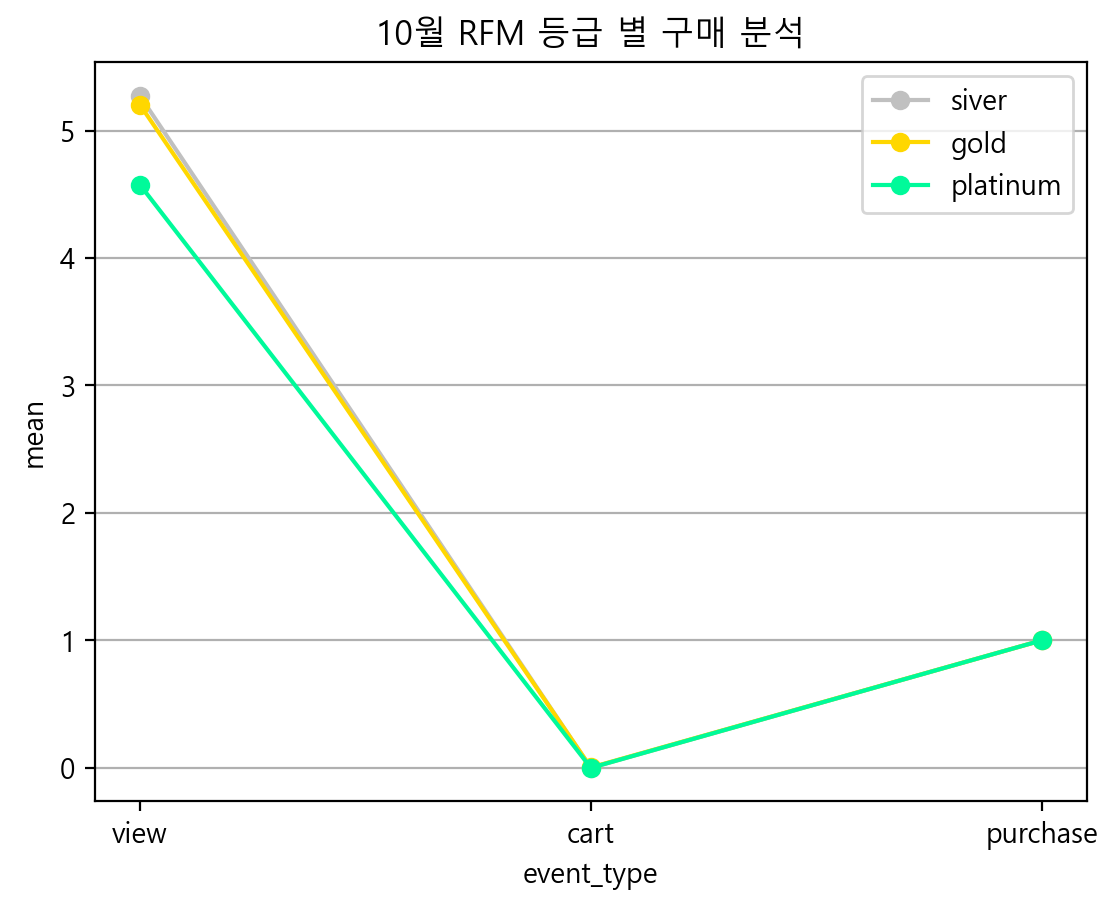

In [125]:
# 시각화

plt.plot(silver_mean, color='silver',  marker='o', label="siver")
plt.plot(gold_mean, color='gold', marker='o', label="gold")
plt.plot(platinum_mean, color='mediumspringgreen', marker='o', label="platinum")
plt.grid(True, axis='y')
plt.title('10월 RFM 등급 별 구매 분석')
plt.xlabel('event_type')
plt.ylabel('mean')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

In [87]:
rfm_view = pd.DataFrame({'product' : ['silver', 'gold', 'platinum'], 'view' : [silver_mean[0], gold_mean[0], platinum_mean[0]]})
rfm_view

,product,view
0,silver,5.272431
1,gold,5.202873
2,platinum,4.575075


In [89]:
rfm_view.loc[0]

product      silver
view       5.272431
Name: 0, dtype: object

Text(0.5, 1.0, '10월 고객 등급별 구매시 평균 view 수')

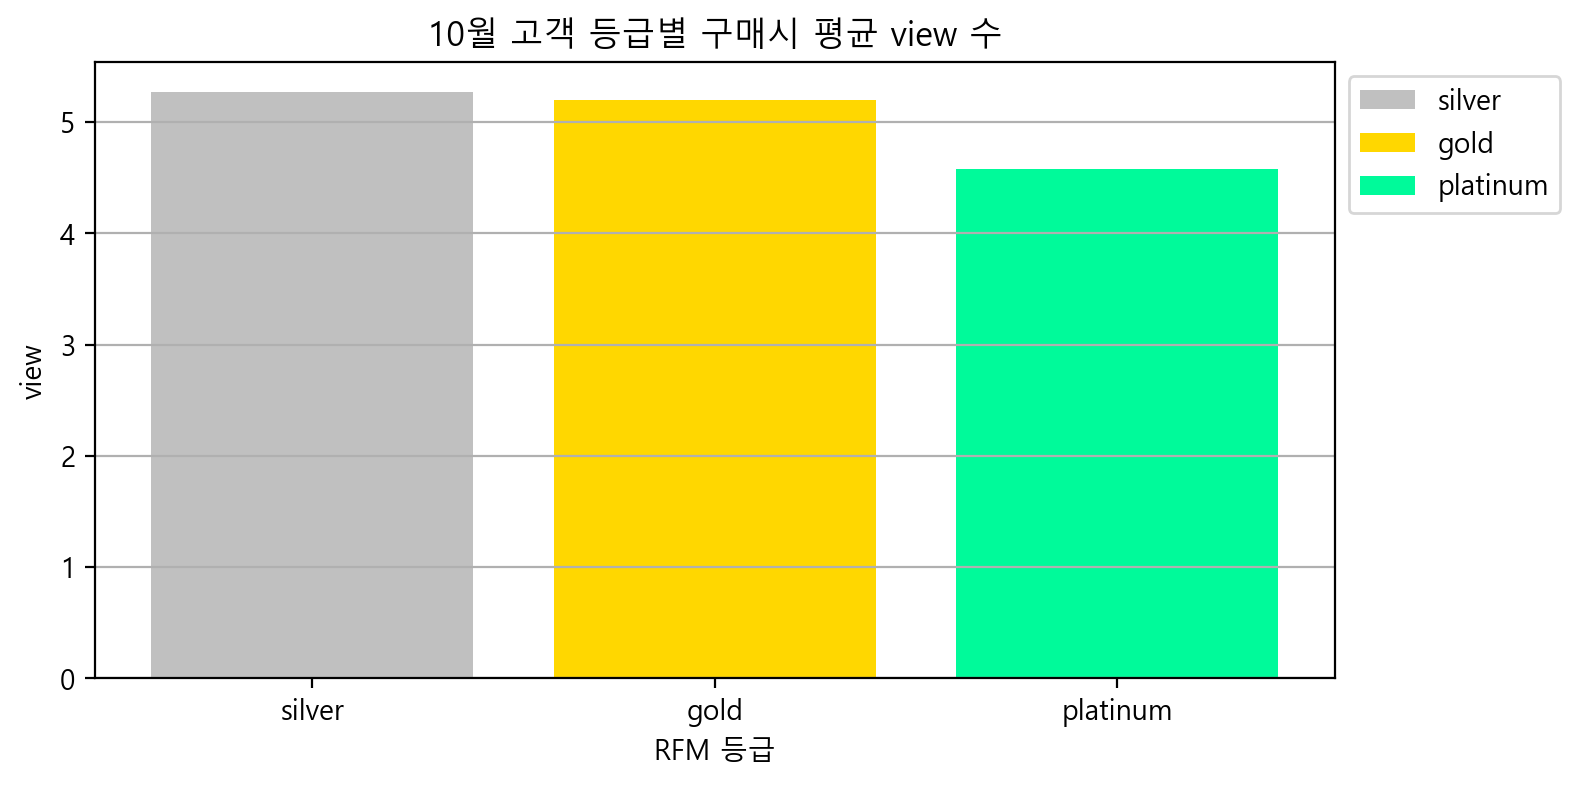

In [117]:
# view만 시각화
plt.figure(figsize=(8, 4))
x = ['silver', 'gold', 'platinum']
y = [silver_mean[0], gold_mean[0], platinum_mean[0]]
plt.bar(x, y, color = ['silver', 'gold', 'mediumspringgreen'], label=x)

plt.xlabel("RFM 등급")
plt.ylabel("view")
plt.grid(True, axis='y')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('10월 고객 등급별 구매시 평균 view 수')